In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn import linear_model

%matplotlib inline

In [100]:
# Aquire, load, and preview data
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [101]:
# Instantiate and fit our model
regr = linear_model.LinearRegression()
Y = data["Sales"]#.values.reshape(-1, 1)
X = data[["TV", "Radio", "Newspaper"]]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
# Show results
print("\nCofficients:\n", regr.coef_)
print("\nIntercept:\n", regr.intercept_)
print("\nR-squared:\n", regr.score(X, Y))


Cofficients:
 [ 0.04576465  0.18853002 -0.00103749]

Intercept:
 2.9388893694594085

R-squared:
 0.8972106381789521


In [103]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

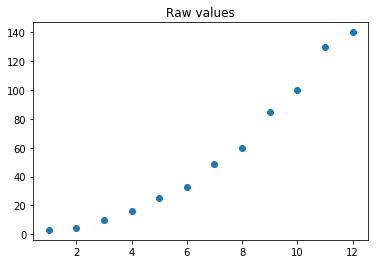

In [104]:
# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title("Raw values")
plt.show()

In [105]:
# Create a feature using a non-linear transformation.
sqrt_feature = [np.sqrt(x) for x in feature]
sqrt_feature

[1.7320508075688772,
 2.0,
 3.1622776601683795,
 4.0,
 5.0,
 5.744562646538029,
 7.0,
 7.745966692414834,
 9.219544457292887,
 10.0,
 11.40175425099138,
 11.832159566199232]

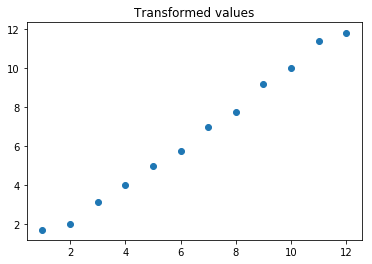

In [106]:
# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title("Transformed values")
plt.show()

In [107]:
# Extract predicted values
predicted = regr.predict(X)
actual = data["Sales"]
residual = actual - predicted

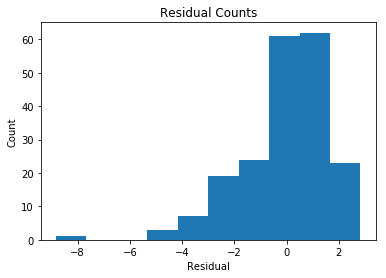

In [108]:
plt.hist(residual)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

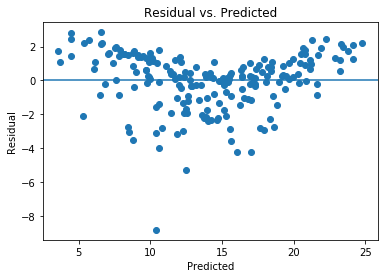

In [109]:
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

In [110]:
corr = X.corr()
print(corr)

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

### Multivariate non-normality

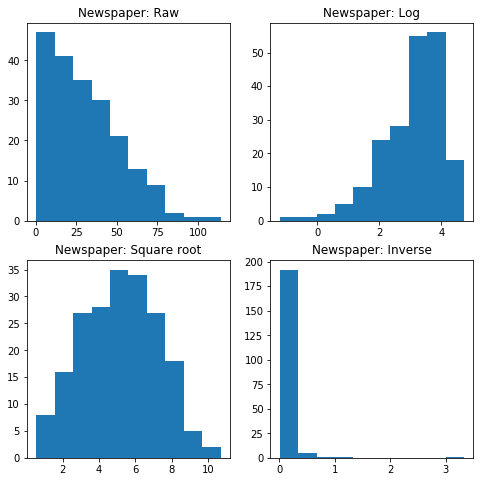

In [111]:
fig = plt.figure(figsize=(8, 8))

fig.add_subplot(221)
plt.hist(data["Newspaper"])
plt.title("Newspaper: Raw")

fig.add_subplot(222)
plt.hist(np.log(data["Newspaper"]))
plt.title("Newspaper: Log")

fig.add_subplot(223)
plt.hist(np.sqrt(data["Newspaper"]))
plt.title("Newspaper: Square root")

ax3=fig.add_subplot(224)
plt.hist(1 / data["Newspaper"])
plt.title("Newspaper: Inverse")
plt.show()

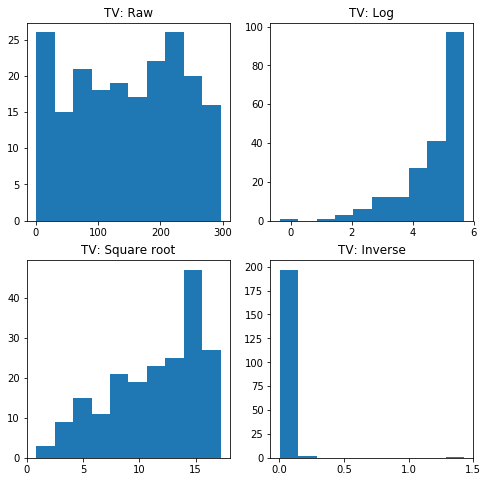

In [112]:
fig = plt.figure(figsize=(8, 8))

fig.add_subplot(221)
plt.hist(data["TV"])
plt.title("TV: Raw")

fig.add_subplot(222)
plt.hist(np.log(data["TV"]))
plt.title("TV: Log")

fig.add_subplot(223)
plt.hist(np.sqrt(data["TV"]))
plt.title("TV: Square root")

ax3=fig.add_subplot(224)
plt.hist(1 / data["TV"])
plt.title("TV: Inverse")
plt.show()

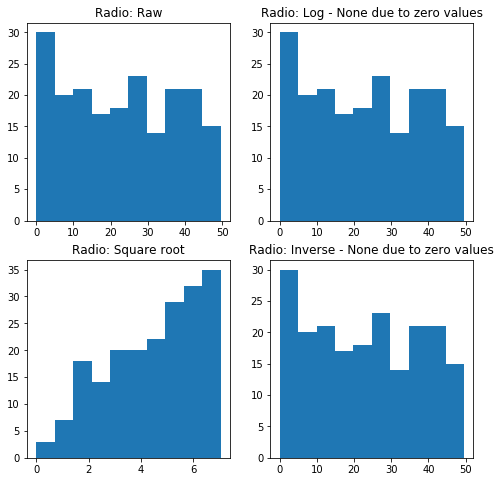

In [113]:
fig = plt.figure(figsize=(8, 8))

fig.add_subplot(221)
plt.hist(data["Radio"])
plt.title("Radio: Raw")

fig.add_subplot(222)
plt.hist(data["Radio"])
plt.title("Radio: Log - None due to zero values")

fig.add_subplot(223)
plt.hist(np.sqrt(data["Radio"]))
plt.title("Radio: Square root")

ax3=fig.add_subplot(224)
plt.hist(data["Radio"])
plt.title("Radio: Inverse - None due to zero values")
plt.show()

I don't see a useful transformation for radio, but we add two features for newspaper and TV below:

In [114]:
data["sqrt_newspaper"] = data["Newspaper"].apply(lambda x: np.sqrt(x))
data["log_TV"] = data["TV"].apply(lambda x: np.log(x))

In [115]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,sqrt_newspaper,log_TV
0,1,230.1,37.8,69.2,22.1,8.318654,5.438514
1,2,44.5,39.3,45.1,10.4,6.715653,3.795489
2,3,17.2,45.9,69.3,9.3,8.324662,2.844909
3,4,151.5,41.3,58.5,18.5,7.648529,5.020586
4,5,180.8,10.8,58.4,12.9,7.641989,5.197391


In [116]:
# Instantiate and fit our model
regr = linear_model.LinearRegression()
Y = data["Sales"]#.values.reshape(-1, 1)
X = data[["log_TV", "Radio", "sqrt_newspaper"]]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
# Show results
print("\nCofficients:\n", regr.coef_)
print("\nIntercept:\n", regr.intercept_)
print("\nR-squared:\n", regr.score(X, Y))


Cofficients:
 [ 3.9383261   0.20725459 -0.04338596]

Intercept:
 -8.97613512673507

R-squared:
 0.9068332388141338


In [118]:
# Extract predicted values
predicted = regr.predict(X)
actual = data["Sales"]
residual = actual - predicted

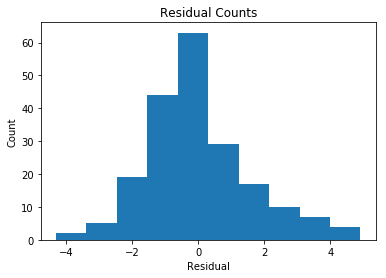

In [119]:
plt.hist(residual)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

Looks much better.

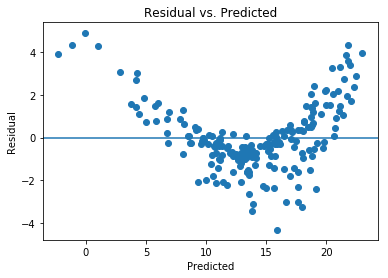

In [121]:
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

Still not so good.

### Homoscedasticity

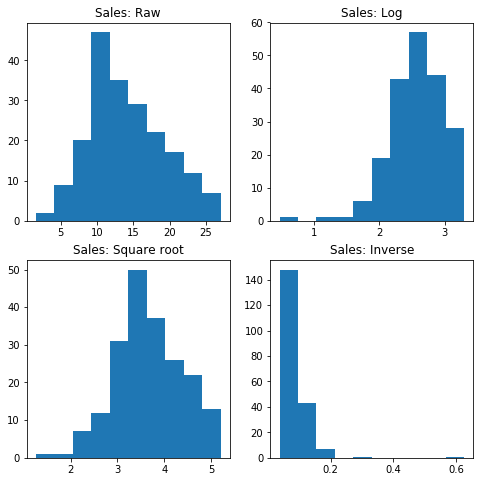

In [122]:
fig = plt.figure(figsize=(8, 8))

fig.add_subplot(221)
plt.hist(data["Sales"])
plt.title("Sales: Raw")

fig.add_subplot(222)
plt.hist(np.log(data["Sales"]))
plt.title("Sales: Log")

fig.add_subplot(223)
plt.hist(np.sqrt(data["Sales"]))
plt.title("Sales: Square root")

ax3=fig.add_subplot(224)
plt.hist(1 / data["Sales"])
plt.title("Sales: Inverse")
plt.show()

I don't actually see a useful transformation, but let's try the sqrt of Sales and see what happens.

In [123]:
data["sqrt_sales"] = data["Sales"].apply(lambda x: np.sqrt(x))
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,sqrt_newspaper,log_TV,sqrt_sales
0,1,230.1,37.8,69.2,22.1,8.318654,5.438514,4.701064
1,2,44.5,39.3,45.1,10.4,6.715653,3.795489,3.224903
2,3,17.2,45.9,69.3,9.3,8.324662,2.844909,3.049590
3,4,151.5,41.3,58.5,18.5,7.648529,5.020586,4.301163
4,5,180.8,10.8,58.4,12.9,7.641989,5.197391,3.591657


In [124]:
# Instantiate and fit our model
regr = linear_model.LinearRegression()
Y = data["sqrt_sales"]#.values.reshape(-1, 1)
X = data[["log_TV", "Radio", "sqrt_newspaper"]]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
# Show results
print("\nCofficients:\n", regr.coef_)
print("\nIntercept:\n", regr.intercept_)
print("\nR-squared:\n", regr.score(X, Y))


Cofficients:
 [ 0.57709949  0.02622038 -0.00346629]

Intercept:
 0.38870120611252723

R-squared:
 0.955095865167498


In [126]:
# Extract predicted values
predicted = regr.predict(X)
actual = data["Sales"]
residual = actual - predicted

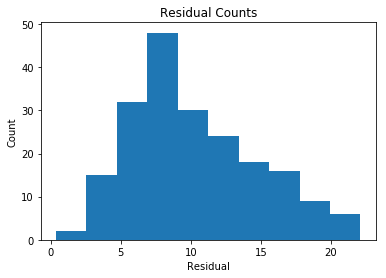

In [127]:
plt.hist(residual)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

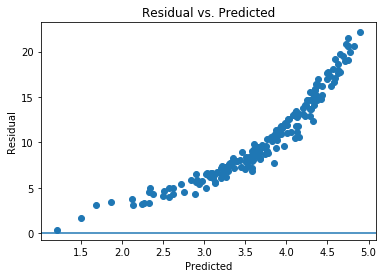

In [128]:
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

This looks much worse...I'm not certain how to fix the homoscedastcity problem.